In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
import seaborn as sns; sns.set()

In [3]:
hmd = pd.read_csv(".\hmd_weekly_deaths\stmf.csv")

In [6]:
#Convert 
country_conversion = { 'AUS2' : 'AUS', 'GBRTENW' : 'GBR', 'GBR_NIR' : 'GBR', 'GBR_SCO' : 'GBR', 'FRATNP' : 'FRA', 'DEUTNP' : 'DEU', 'NZL_NP' : 'NZL'}
hmd = hmd.replace({"CountryCode" : country_conversion})
hmd.rename(columns={'CountryCode' :'country', 'Year' : 'year', 'Week' : 'week'}, inplace = True)

In [7]:
hmd.country.astype('category')

0         AUS
1         AUS
2         AUS
3         AUS
4         AUS
         ... 
109255    USA
109256    USA
109257    USA
109258    USA
109259    USA
Name: country, Length: 109260, dtype: category
Categories (36, object): ['AUS', 'AUT', 'BEL', 'BGR', ..., 'SVN', 'SWE', 'TWN', 'USA']

In [8]:
#retain only the combined male and female deaths
hmd_combined = hmd[hmd.Sex == 'b']

In [9]:
#merge various Great Britain rows into one
hmd_test = hmd_combined.groupby(['country', 'week', 'year']).sum().reset_index()

In [10]:
hmd_test[hmd_test.country == 'GBR']

,country,week,year,D0_14,D15_64,D65_74,D75_84,D85p,DTotal,R0_14,R15_64,R65_74,R75_84,R85p,RTotal,Split,SplitSex,Forecast
13320,GBR,1,2001,8.0,219.0,279.0,426.0,376.0,1308.0,0.000459,0.003397,0.032467,0.081956,0.224780,0.013436,0,0,0
13321,GBR,1,2002,9.0,224.0,262.0,409.0,352.0,1256.0,0.000524,0.003466,0.030329,0.077465,0.212228,0.012899,0,0,0
13322,GBR,1,2003,6.0,232.0,248.0,370.0,321.0,1177.0,0.000354,0.003579,0.028515,0.068887,0.197863,0.012074,0,0,0
13323,GBR,1,2004,6.0,205.0,253.0,441.0,337.0,1242.0,0.000357,0.003147,0.028909,0.080874,0.208921,0.012703,0,0,0
13324,GBR,1,2005,10.0,217.0,242.0,433.0,342.0,1244.0,0.000599,0.003310,0.027548,0.078910,0.204021,0.012666,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14467,GBR,52,2021,44.0,1406.0,1532.0,2831.0,3992.0,9805.0,0.000672,0.005883,0.037194,0.121039,0.386991,0.024398,0,0,3
14468,GBR,53,2004,10.0,196.0,240.0,409.0,329.0,1184.0,0.000595,0.003009,0.027424,0.075006,0.203962,0.012110,0,0,0
14469,GBR,53,2009,5.0,180.0,192.0,354.0,333.0,1064.0,0.000303,0.002670,0.021109,0.062010,0.173512,0.010575,0,0,0
14470,GBR,53,2015,52.0,1236.0,1510.0,2570.0,3405.0,8773.0,0.000318,0.005586,0.044970,0.117769,0.393075,0.023121,0,0,0


In [11]:
hmd_test_selected = hmd_test[['country', 'week', 'year', 'DTotal']]

In [12]:
hmd_test_selected
hmd_test_selected.to_csv('selected_hmd')

In [13]:
#adding a moving average of total deaths... 
hmd = pd.read_csv("selected_hmd", parse_dates = {"date" : ['year', 'week']}, keep_date_col = True)
hmd['date'] = pd.to_datetime(hmd['date'] + ' 0', format='%Y %W %w')
hmd = hmd.sort_values(by='date')
hmd['mov_avg'] = hmd.groupby('country')['DTotal'].transform(lambda x: x.rolling(7, 1).mean())

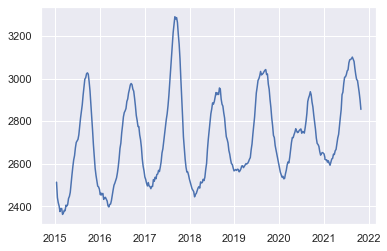

In [14]:
plt.plot(hmd[hmd.country=='AUS'].date, hmd[hmd.country=='AUS'].mov_avg);

In [16]:
hmd.to_csv('selected_hmd')

In [15]:
hmd

,date,Unnamed: 0,country,week,year,DTotal,mov_avg
10501,1990-01-07,10501,FIN,1,1990,1146.0,1146.000000
10533,1990-01-14,10533,FIN,2,1990,1139.0,1142.500000
10565,1990-01-21,10565,FIN,3,1990,1185.0,1156.666667
10597,1990-01-28,10597,FIN,4,1990,1164.0,1158.500000
10629,1990-02-04,10629,FIN,5,1990,1103.0,1147.400000
...,...,...,...,...,...,...,...
20609,2022-01-30,20609,LTU,4,2022,917.0,962.000000
13433,2022-02-06,13433,GBR,5,2022,1610.0,11961.571429
7491,2022-02-06,7491,DNK,5,2022,1193.0,1236.428571
24108,2022-02-06,24108,NLD,5,2022,3450.0,3384.285714
